# Assignment 11: Convolutional Neural Networks, Transfer Learning and Data Augmentation
### Choosen Datasets:

**Multi-Class Classification**

[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

This is a dataset of 70,000 Zalando’s article images. Each image is a 28x28 grayscale image, associated with a label from 10 classes.

<hr>

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


<hr>

## **Multi-Class Classification**

multiclass classification or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

<hr>

### About The Dataset 

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**Content**

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


**Labels**

Each training and test example is assigned to one of the following labels:

- 0  T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


------

Each row is a separate image

Column 1 is the class label.

Remaining columns are pixel numbers (784 total).

Each value is the darkness of the pixel (1 to 255)

<hr>

**Import Libararies**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical


**Load Dataset**

In [92]:
# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Train data Shape :", X_train.shape)
print("Train data Shape :", X_test.shape)

Train data Shape : (60000, 28, 28)
Train data Shape : (10000, 28, 28)


## **Visualization**

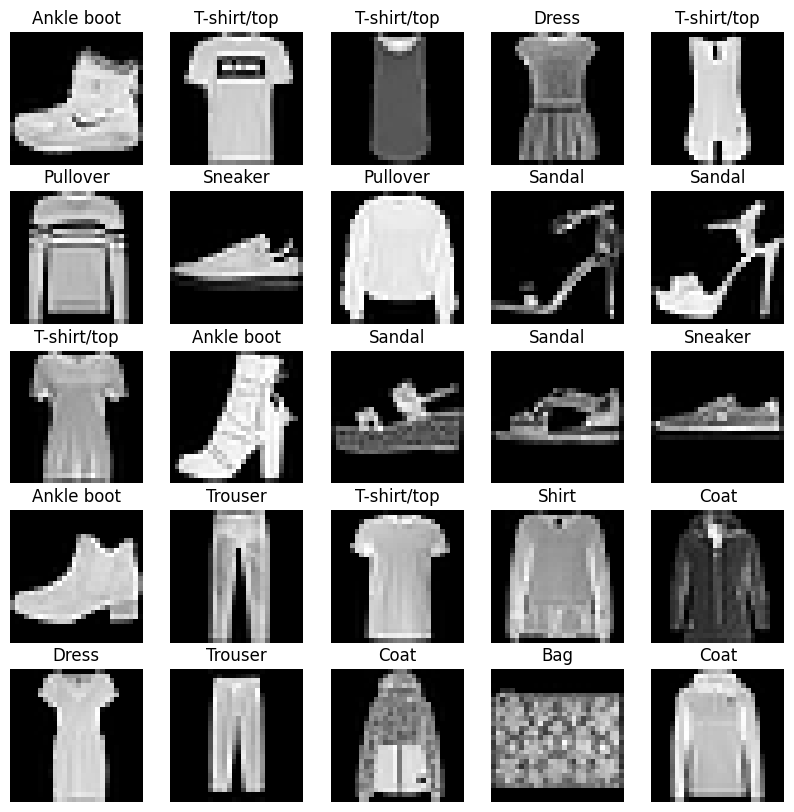

In [62]:
# Define class labels for better visualization
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')

plt.show()


**Pie Plot**

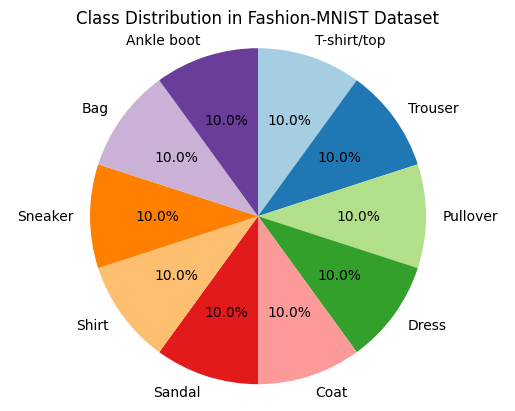

In [63]:
from collections import Counter

# Count the occurrences of each class
class_counts = Counter(y_train)

# Define class labels for better visualization
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(class_counts.values(), labels=class_labels, autopct='%1.1f%%', startangle=90, counterclock=False, colors=plt.cm.Paired.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Class Distribution in Fashion-MNIST Dataset")
plt.show()


### **`Convolutional network with Keras`**

1. **Preprocess the data:**
   - The pixel values of the images are normalized to the range [0, 1] by dividing by 255. This is done to ensure that the input features are within a manageable scale for training the neural network.
   - The shape of the input images is adjusted to include a single channel (grayscale) using `reshape`.

3. **One-hot encode the labels:**
   - The labels (`y_train` and `y_test`) are one-hot encoded using `to_categorical`. This is a common step in classification tasks where each label is represented as a binary vector.

4. **Define the convolutional neural network model:**
   - The neural network model is defined using the Keras Sequential API.
   - It starts with a convolutional layer (`Conv2D`) with 32 filters, each of size 3x3, and using the ReLU activation function.
   - Max-pooling layers (`MaxPooling2D`) follow the convolutional layers to downsample the spatial dimensions.
   - Another set of convolutional and max-pooling layers is added for deeper hierarchical feature extraction.
   - The model is then flattened to a 1D array and connected to a fully connected (`Dense`) layer with 128 neurons and a ReLU activation function.
   - The output layer consists of 10 neurons (for the 10 classes in Fashion MNIST) with a softmax activation function.
   - The model is compiled with the Adam optimizer, 'sparse_categorical_crossentropy' loss function (as the labels are integers), and accuracy as the metric.

5. **Use StratifiedKFold for 3-fold cross-validation:**
   - `StratifiedKFold` is employed to perform 3-fold cross-validation. This ensures that each fold preserves the percentage of samples for each class.

6. **Create the KerasClassifier:**
   - The `KerasClassifier` is created with the `create_model` function as the model-building function. It's set to train for 5 epochs with a batch size of 32.

7. **Evaluate the model using cross_val_score:**
   - The `cross_val_score` function is used to evaluate the model's performance using cross-validation. The input data is `X_train`, the integer-encoded labels (`np.argmax(y_train, axis=1)`), and the defined `kfold` strategy.

8. **Print the average validation accuracy:**
   - The average validation accuracy across the three folds is calculated using `np.mean(results)` and printed to the console.

In [64]:
# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the convolutional neural network model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Use StratifiedKFold for 3-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create the KerasClassifier
model = KerasClassifier(model=create_model, epochs=5, batch_size=32, verbose=1)

# Evaluate the model using cross_val_score
results = cross_val_score(model, X_train, np.argmax(y_train, axis=1), cv=kfold)

# Print the average validation accuracy
print(f"Average Validation Accuracy: {np.mean(results)}")

Epoch 1/5
1250/1250 [==============================] - 9s 6ms/step - loss: 0.4884 - accuracy: 0.8237
Epoch 2/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3301 - accuracy: 0.8792
Epoch 3/5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2828 - accuracy: 0.8963
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2518 - accuracy: 0.9065
Epoch 5/5
625/625 [==============================] - 2s 3ms/step
Epoch 1/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4968 - accuracy: 0.8206
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3270 - accuracy: 0.8808
Epoch 3/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2783 - accuracy: 0.8975
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2438 - accuracy: 0.9087
Epoch 5/5
625/625 [==============================] - 2s 3ms/step
Epoch 1/5
1250/1250 [==============================] - 9s 6ms/

<hr>

### Hyperparameter Tuning Process:

1. **Kernel Size:**
   - You provided a range of kernel sizes to try, such as (3, 3), (5, 5), and (7, 7).
   - The code iterates through these kernel sizes and evaluates the model's performance for each.

2. **Stride:**
   - You provided a range of stride values to try, such as (1, 1), (2, 2), and (3, 3).
   - The code iterates through these stride values and evaluates the model's performance for each.

3. **Pooling Size (Pool Size) and Pooling Stride:**
   - Pooling size (2, 2) is used, and the pooling stride is not explicitly set, using the default which is the same as the pooling size.
   - We can experiment with different pooling sizes and strides to observe their impact on the model's performance.

Each hyperparameter controls a different aspect of the convolutional neural network (CNN) architecture, and tuning them allows we to find the combination that results in the best model performance for our specific task and dataset. The process involves experimenting with different values for each hyperparameter and observing their effects on training and validation metrics.

### **`Hyperparameter Tuning - Kernel Size`**

In [121]:
# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Epoch 1/5
1500/1500 - 11s - loss: 0.4815 - accuracy: 0.8245 - val_loss: 0.3438 - val_accuracy: 0.8783 - 11s/epoch - 8ms/step
Epoch 2/5
1500/1500 - 11s - loss: 0.3202 - accuracy: 0.8831 - val_loss: 0.2889 - val_accuracy: 0.8947 - 11s/epoch - 7ms/step
Epoch 3/5
1500/1500 - 10s - loss: 0.2722 - accuracy: 0.9003 - val_loss: 0.2923 - val_accuracy: 0.8933 - 10s/epoch - 6ms/step
Epoch 4/5
1500/1500 - 10s - loss: 0.2387 - accuracy: 0.9112 - val_loss: 0.2594 - val_accuracy: 0.9039 - 10s/epoch - 6ms/step
Epoch 5/5
1500/1500 - 10s - loss: 0.2111 - accuracy: 0.9209 - val_loss: 0.2650 - val_accuracy: 0.9049 - 10s/epoch - 7ms/step
313/313 - 1s - loss: 0.2865 - accuracy: 0.8967 - 1s/epoch - 3ms/step
Epoch 1/5
1500/1500 - 11s - loss: 0.4711 - accuracy: 0.8310 - val_loss: 0.3418 - val_accuracy: 0.8761 - 11s/epoch - 7ms/step
Epoch 2/5
1500/1500 - 11s - loss: 0.3104 - accuracy: 0.8873 - val_loss: 0.2902 - val_accuracy: 0.8954 - 11s/epoch - 7ms/step
Epoch 3/5
1500/1500 - 10s - loss: 0.2650 - accuracy: 0.9

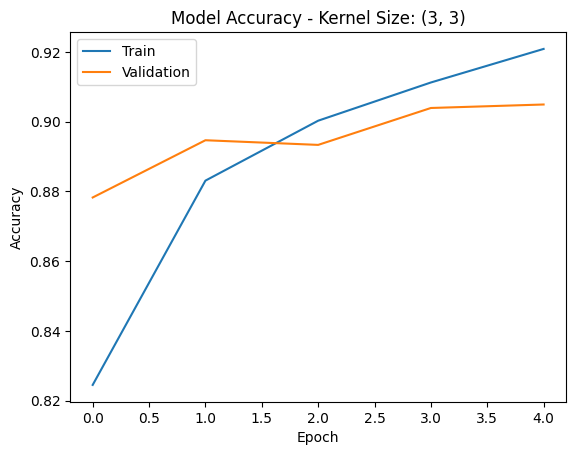

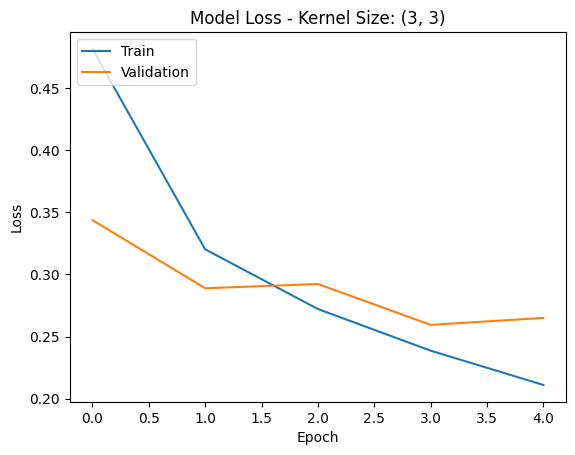

Kernel Size: (3, 3) - Test Loss: 0.28654322028160095, Test Accuracy: 0.8967000246047974


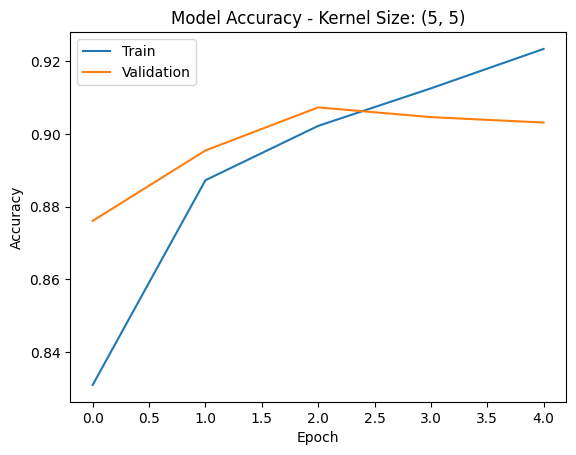

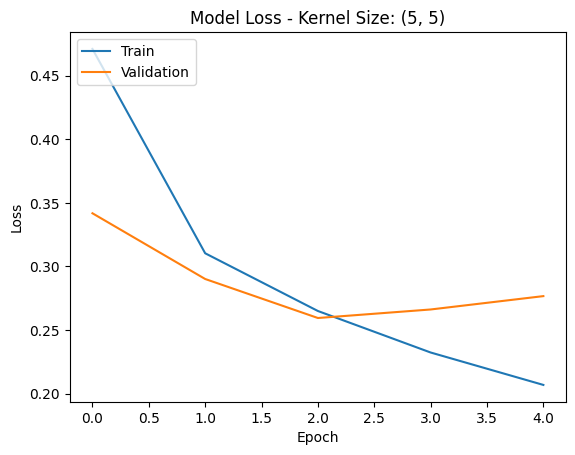

Kernel Size: (5, 5) - Test Loss: 0.29251766204833984, Test Accuracy: 0.8977000117301941


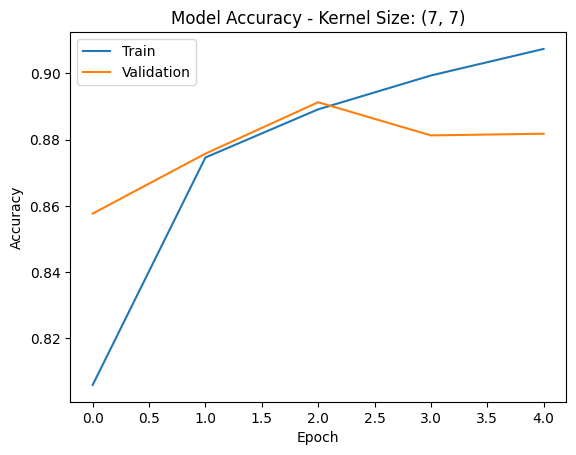

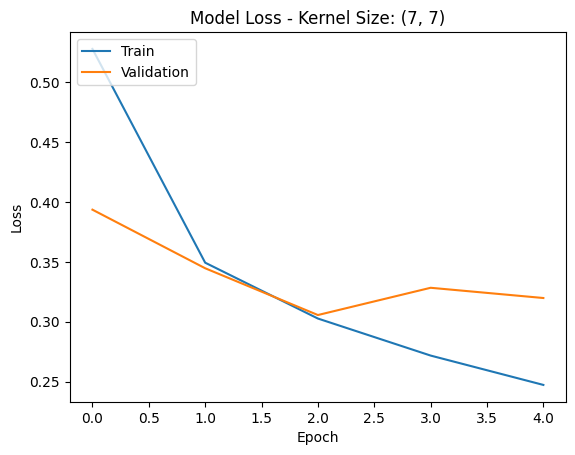

Kernel Size: (7, 7) - Test Loss: 0.3271825909614563, Test Accuracy: 0.8810999989509583


In [118]:
def create_model(kernel_size=(3, 3)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size, input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

kernel_sizes_to_try = [(3, 3), (5, 5), (7, 7)]

results = []

for kernel_size in kernel_sizes_to_try:
    model = create_model(kernel_size)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # Store results for plotting
    results.append({
        'kernel_size': kernel_size,
        'history': history,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

# Plotting
for result in results:
    kernel_size_str = str(result['kernel_size'])
    
    # Plot training & validation accuracy values
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Model Accuracy - Kernel Size: {kernel_size_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Model Loss - Kernel Size: {kernel_size_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Print test metrics
    print(f"Kernel Size: {kernel_size_str} - Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")


### **`Hyperparameter Tuning -  Stride`**

Epoch 1/5
1500/1500 - 11s - loss: 0.4650 - accuracy: 0.8316 - val_loss: 0.3562 - val_accuracy: 0.8721 - 11s/epoch - 7ms/step
Epoch 2/5
1500/1500 - 10s - loss: 0.3140 - accuracy: 0.8860 - val_loss: 0.3137 - val_accuracy: 0.8808 - 10s/epoch - 6ms/step
Epoch 3/5
1500/1500 - 10s - loss: 0.2659 - accuracy: 0.9030 - val_loss: 0.2761 - val_accuracy: 0.8990 - 10s/epoch - 6ms/step
Epoch 4/5
1500/1500 - 10s - loss: 0.2330 - accuracy: 0.9133 - val_loss: 0.2985 - val_accuracy: 0.8923 - 10s/epoch - 6ms/step
Epoch 5/5
1500/1500 - 10s - loss: 0.2078 - accuracy: 0.9227 - val_loss: 0.2439 - val_accuracy: 0.9139 - 10s/epoch - 6ms/step
313/313 - 1s - loss: 0.2534 - accuracy: 0.9077 - 1s/epoch - 3ms/step
Epoch 1/5
1500/1500 - 6s - loss: 0.6925 - accuracy: 0.7517 - val_loss: 0.4968 - val_accuracy: 0.8216 - 6s/epoch - 4ms/step
Epoch 2/5
1500/1500 - 5s - loss: 0.4721 - accuracy: 0.8285 - val_loss: 0.4327 - val_accuracy: 0.8429 - 5s/epoch - 3ms/step
Epoch 3/5
1500/1500 - 5s - loss: 0.4165 - accuracy: 0.8478 -

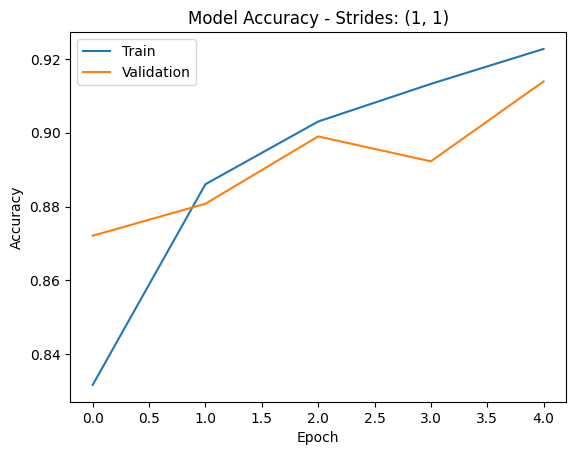

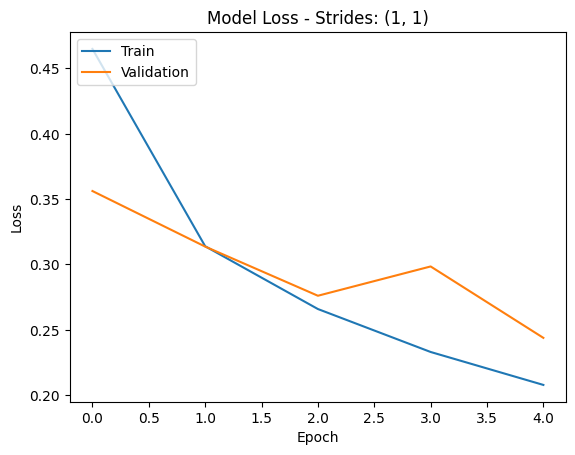

Strides: (1, 1) - Test Loss: 0.253353476524353, Test Accuracy: 0.9077000021934509


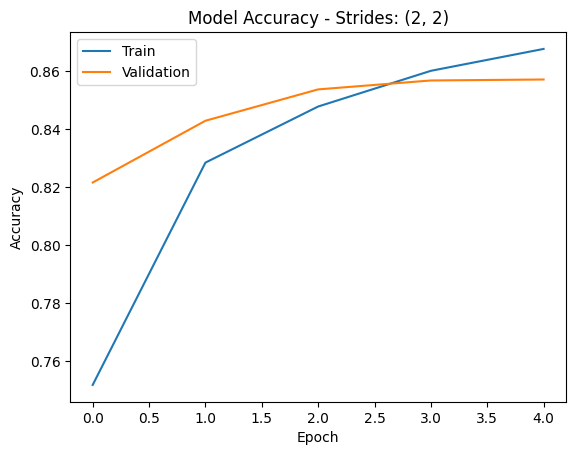

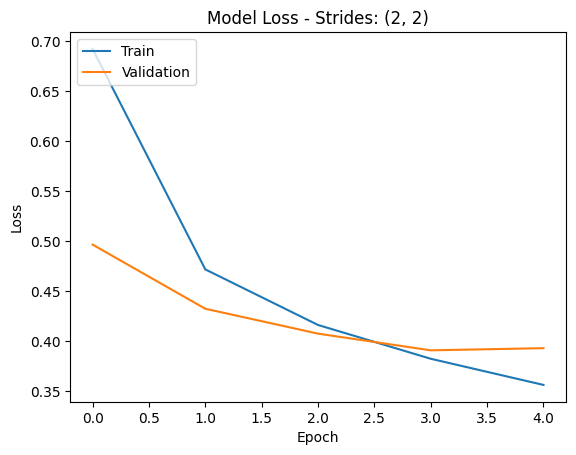

Strides: (2, 2) - Test Loss: 0.41593968868255615, Test Accuracy: 0.852400004863739


In [123]:
def create_model(strides=(1, 1)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', strides=strides))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', strides=strides))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Add three options for strides
strides_to_try = [(1, 1), (2, 2)]

results_stride = []

for strides in strides_to_try:
    model = create_model(strides)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # Store results for plotting
    results_stride.append({
        'strides': strides,
        'history': history,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

# Plotting
for result in results_stride:
    strides_str = str(result['strides'])
    
    # Plot training & validation accuracy values
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Model Accuracy - Strides: {strides_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Model Loss - Strides: {strides_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Print test metrics
    print(f"Strides: {strides_str} - Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")


### **`Hyperparameter Tuning -  Pooling Size`**

Epoch 1/5
1500/1500 - 11s - loss: 0.4752 - accuracy: 0.8255 - val_loss: 0.3431 - val_accuracy: 0.8783 - 11s/epoch - 7ms/step
Epoch 2/5
1500/1500 - 10s - loss: 0.3172 - accuracy: 0.8840 - val_loss: 0.3031 - val_accuracy: 0.8877 - 10s/epoch - 6ms/step
Epoch 3/5
1500/1500 - 10s - loss: 0.2675 - accuracy: 0.9013 - val_loss: 0.2667 - val_accuracy: 0.9022 - 10s/epoch - 7ms/step
Epoch 4/5
1500/1500 - 10s - loss: 0.2371 - accuracy: 0.9129 - val_loss: 0.2734 - val_accuracy: 0.8988 - 10s/epoch - 7ms/step
Epoch 5/5
1500/1500 - 10s - loss: 0.2081 - accuracy: 0.9226 - val_loss: 0.2534 - val_accuracy: 0.9100 - 10s/epoch - 6ms/step
313/313 - 1s - loss: 0.2644 - accuracy: 0.9083 - 1s/epoch - 3ms/step
Epoch 1/5
1500/1500 - 8s - loss: 0.5591 - accuracy: 0.7991 - val_loss: 0.4050 - val_accuracy: 0.8561 - 8s/epoch - 5ms/step
Epoch 2/5
1500/1500 - 8s - loss: 0.3679 - accuracy: 0.8670 - val_loss: 0.3355 - val_accuracy: 0.8773 - 8s/epoch - 5ms/step
Epoch 3/5
1500/1500 - 8s - loss: 0.3129 - accuracy: 0.8852 -

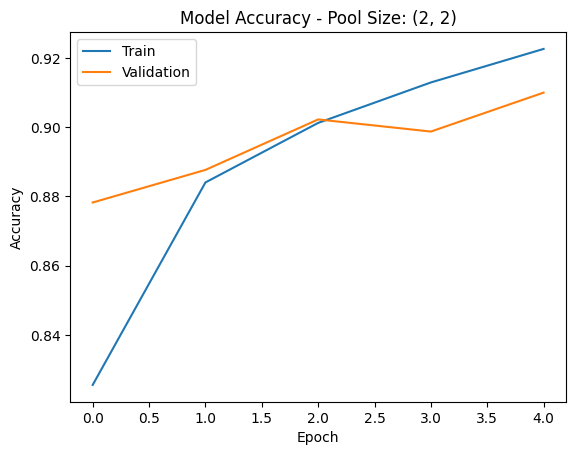

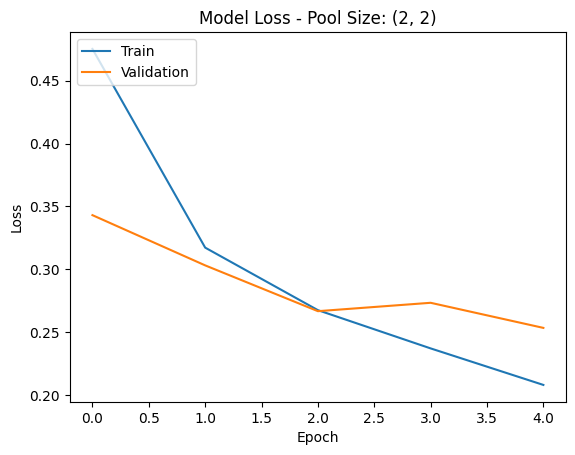

Pool Size: (2, 2) - Test Loss: 0.264413446187973, Test Accuracy: 0.90829998254776


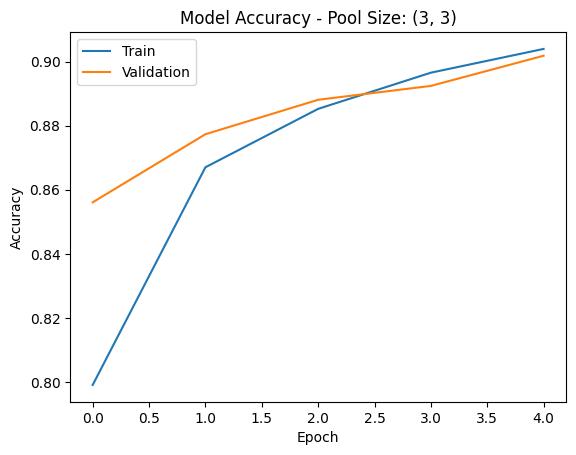

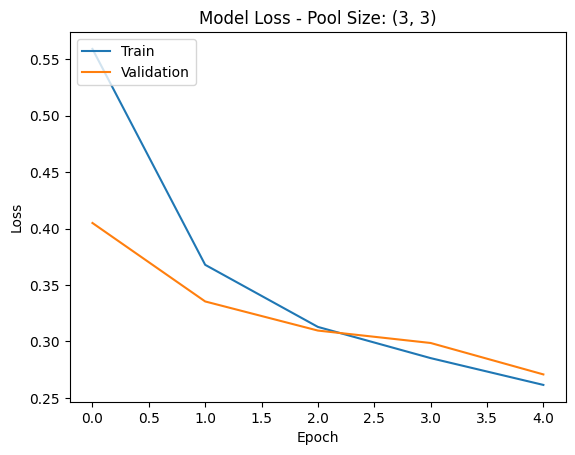

Pool Size: (3, 3) - Test Loss: 0.2874451279640198, Test Accuracy: 0.8985000252723694


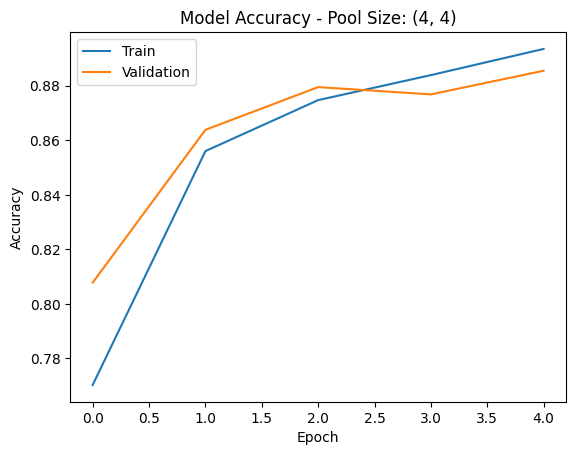

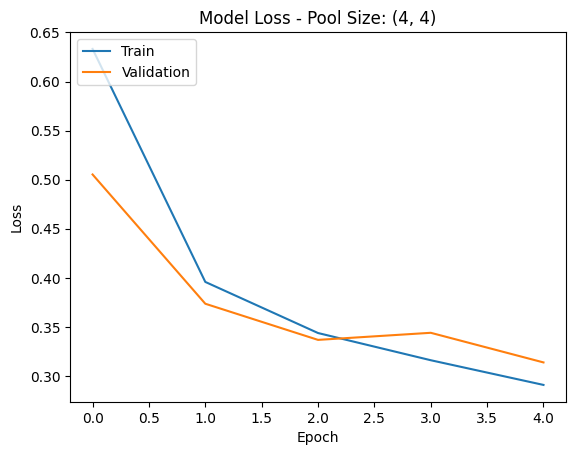

Pool Size: (4, 4) - Test Loss: 0.33084341883659363, Test Accuracy: 0.8812999725341797


In [124]:
def create_model(pool_size=(2, 2)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

pool_sizes_to_try = [(2, 2), (3, 3), (4, 4)]

results_pool_size = []

for pool_size in pool_sizes_to_try:
    model = create_model(pool_size)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # Store results for plotting
    results_pool_size.append({
        'pool_size': pool_size,
        'history': history,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

# Plotting
for result in results_pool_size:
    pool_size_str = str(result['pool_size'])
    
    # Plot training & validation accuracy values
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Model Accuracy - Pool Size: {pool_size_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Model Loss - Pool Size: {pool_size_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Print test metrics
    print(f"Pool Size: {pool_size_str} - Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")


### **`Hyperparameter Tuning - Stride for Pooling Layers`**

Epoch 1/5
1500/1500 - 11s - loss: 0.4785 - accuracy: 0.8255 - val_loss: 0.3469 - val_accuracy: 0.8754 - 11s/epoch - 7ms/step
Epoch 2/5
1500/1500 - 9s - loss: 0.3218 - accuracy: 0.8825 - val_loss: 0.3054 - val_accuracy: 0.8855 - 9s/epoch - 6ms/step
Epoch 3/5
1500/1500 - 10s - loss: 0.2727 - accuracy: 0.8984 - val_loss: 0.2966 - val_accuracy: 0.8918 - 10s/epoch - 7ms/step
Epoch 4/5
1500/1500 - 10s - loss: 0.2392 - accuracy: 0.9112 - val_loss: 0.2600 - val_accuracy: 0.9047 - 10s/epoch - 7ms/step
Epoch 5/5
1500/1500 - 10s - loss: 0.2133 - accuracy: 0.9203 - val_loss: 0.2614 - val_accuracy: 0.9056 - 10s/epoch - 7ms/step
313/313 - 1s - loss: 0.2756 - accuracy: 0.9035 - 1s/epoch - 3ms/step
Epoch 1/5
1500/1500 - 9s - loss: 0.5897 - accuracy: 0.7853 - val_loss: 0.5003 - val_accuracy: 0.8138 - 9s/epoch - 6ms/step
Epoch 2/5
1500/1500 - 8s - loss: 0.4066 - accuracy: 0.8519 - val_loss: 0.3848 - val_accuracy: 0.8632 - 8s/epoch - 5ms/step
Epoch 3/5
1500/1500 - 8s - loss: 0.3561 - accuracy: 0.8679 - v

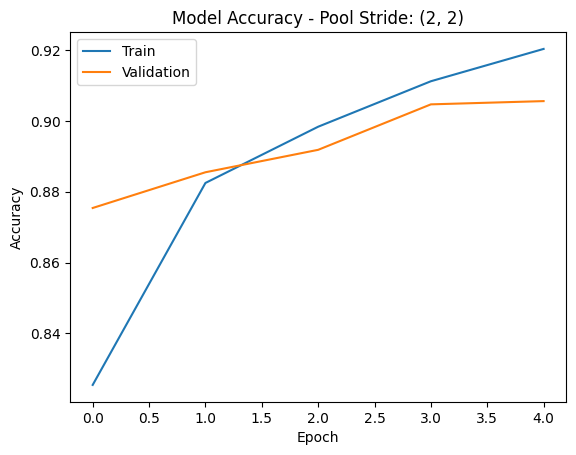

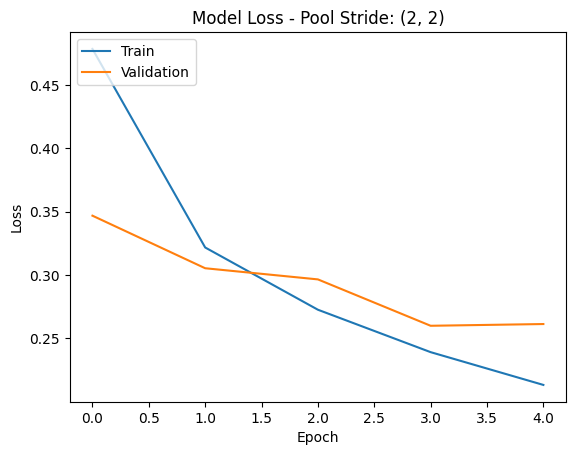

Pool Stride: (2, 2) - Test Loss: 0.2756209373474121, Test Accuracy: 0.9035000205039978


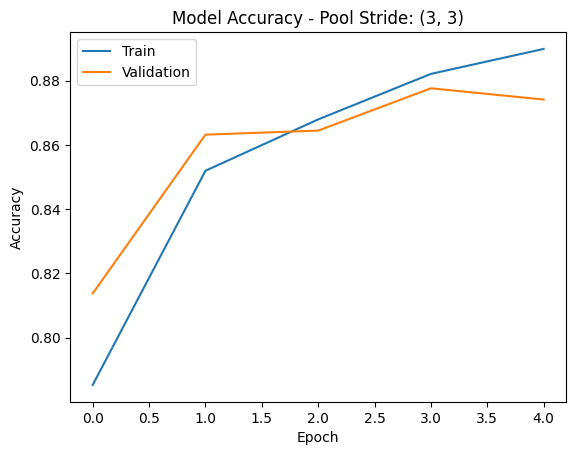

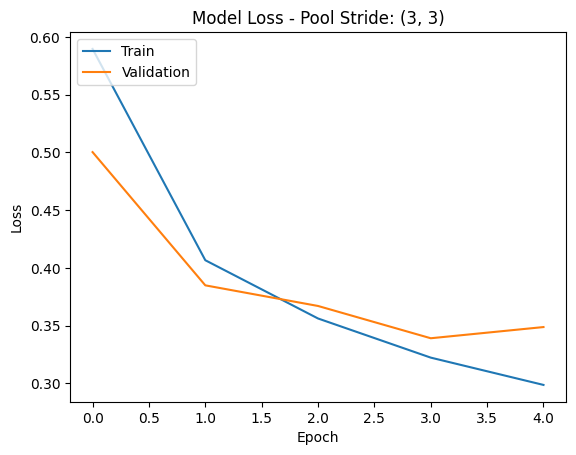

Pool Stride: (3, 3) - Test Loss: 0.36605408787727356, Test Accuracy: 0.8673999905586243


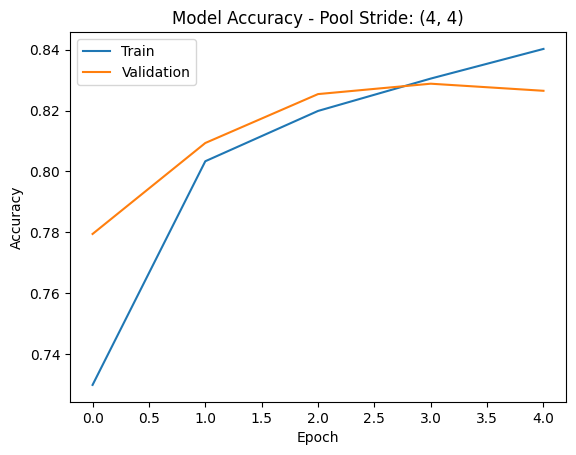

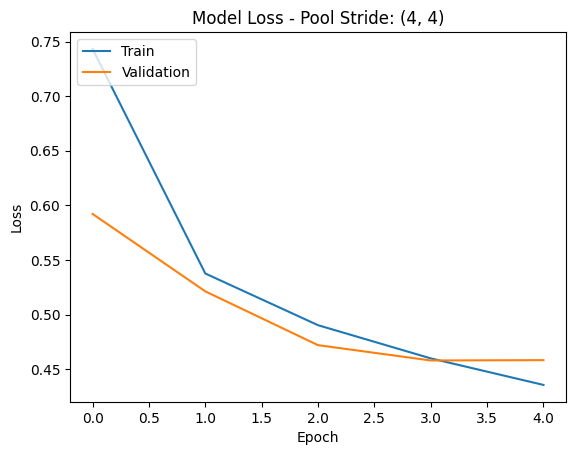

Pool Stride: (4, 4) - Test Loss: 0.48130375146865845, Test Accuracy: 0.8252000212669373


In [125]:
def create_model(pool_stride=(2, 2)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=pool_stride))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=pool_stride))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

pool_strides_to_try = [(2, 2), (3, 3), (4, 4)]

results_pool_stride = []

for pool_stride in pool_strides_to_try:
    model = create_model(pool_stride)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # Store results for plotting
    results_pool_stride.append({
        'pool_stride': pool_stride,
        'history': history,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

# Plotting
for result in results_pool_stride:
    pool_stride_str = str(result['pool_stride'])
    
    # Plot training & validation accuracy values
    plt.plot(result['history'].history['accuracy'])
    plt.plot(result['history'].history['val_accuracy'])
    plt.title(f'Model Accuracy - Pool Stride: {pool_stride_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(result['history'].history['loss'])
    plt.plot(result['history'].history['val_loss'])
    plt.title(f'Model Loss - Pool Stride: {pool_stride_str}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Print test metrics
    print(f"Pool Stride: {pool_stride_str} - Test Loss: {result['test_loss']}, Test Accuracy: {result['test_accuracy']}")


<hr>

### **`Data augmentation and Train our model`**

### 1. ImageDataGenerator Parameters:

- **`rotation_range`**: 
  - Randomly rotates images in the specified range (degrees, 0 to 180).
  - Example: `rotation_range=20` allows rotations up to 20 degrees.

- **`width_shift_range`**:
  - Randomly shifts images horizontally by a fraction of the total width.
  - Example: `width_shift_range=0.1` allows horizontal shifts up to 10% of the total width.

- **`height_shift_range`**:
  - Randomly shifts images vertically by a fraction of the total height.
  - Example: `height_shift_range=0.1` allows vertical shifts up to 10% of the total height.

- **`shear_range`**:
  - Shear intensity (shear angle in degrees).
  - Example: `shear_range=0.2` allows shearing with intensity up to 20 degrees.

- **`zoom_range`**:
  - Randomly zooms into images.
  - Example: `zoom_range=0.2` allows zooming up to 20%.

- **`horizontal_flip`**:
  - Randomly flips images horizontally.

- **`fill_mode`**:
  - Fill mode for points outside the input boundaries.
  - Example: `'nearest'` fills with the nearest available pixel value.

### 2. Model Training Parameters:

- **`batch_size`**:
  - The number of samples in each mini-batch during training.

- **`steps_per_epoch`**:
  - The number of batches to process in each epoch. It's set to ensure that the entire training dataset is seen in each epoch.

- **`epochs`**:
  - The number of times the entire dataset is passed through the model during training.

- **`validation_data`** and **`validation_steps`**:
  - Data and steps for validation during training.

### 3. Model Evaluation:

- **`evaluate`**:
  - Evaluates the model on the provided test set.

### 4. Plotting:

- **`plot`**:
  - Plots the training and validation accuracy over epochs.
  - Plots the training and validation loss over epochs.

### 5. Print Test Metrics:

- Prints the test loss and test accuracy after evaluating the model on the original test set.

These parameters collectively define the data augmentation strategy, the training process, and the evaluation metrics for our convolutional neural network. Adjusting these parameters allows to customize the behavior of the model and experiment with different configurations.

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.7540 - accuracy: 0.7179 - val_loss: 0.6170 - val_accuracy: 0.7657
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5545 - accuracy: 0.7912 - val_loss: 0.5238 - val_accuracy: 0.8094
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4908 - accuracy: 0.8147 - val_loss: 0.4856 - val_accuracy: 0.8229
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4538 - accuracy: 0.8286 - val_loss: 0.4711 - val_accuracy: 0.8234
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4313 - accuracy: 0.8377 - val_loss: 0.4397 - val_accuracy: 0.8344
313/313 - 1s - loss: 0.3520 - accuracy: 0.8692 - 961ms/epoch - 3ms/step


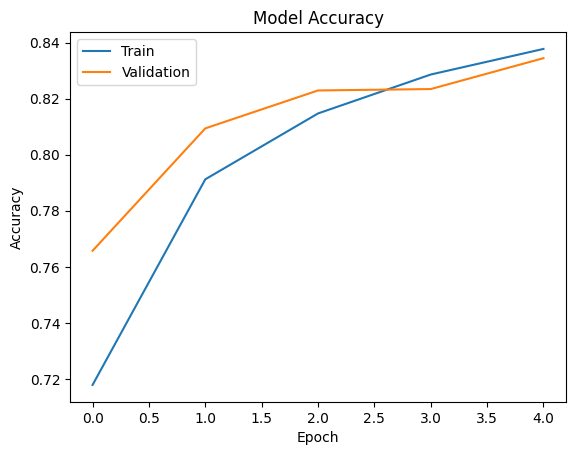

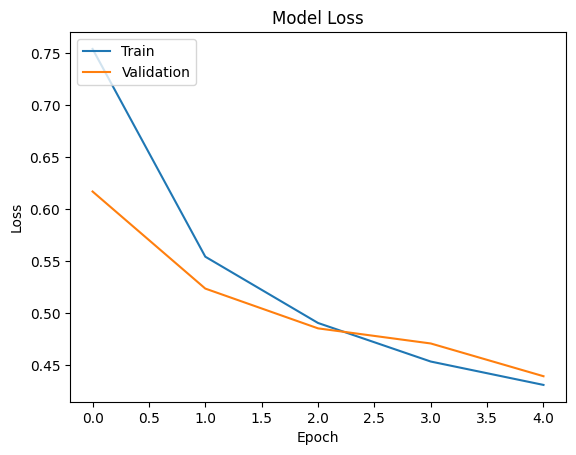

Test Loss: 0.3520222306251526, Test Accuracy: 0.8691999912261963


In [126]:
from keras.preprocessing.image import ImageDataGenerator

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create an instance of the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create and compile the model
model = create_model()

# Number of samples to generate in each epoch
batch_size = 32

# Create generators for training and validation data
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_generator = datagen.flow(X_test, y_test, batch_size=batch_size)

# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size
)

# Evaluate the model on the original test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Display test metrics
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


<hr>

### **`Transfer Learning (VGG19 & ResNet)`**

So far, we have constructed a simple convolutional network, tuned it and improved its performance by exmapnding our dataset using the `ImageDataGenerator` class. Our final model is as strong as its feature extraction capabilities. We spent a considerable time tuing this and other parts of the model.

**Import libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import LabelBinarizer

**Load Dataset**

the original Fashion-MNIST dataset consists of grayscale images with a single channel, and VGG19 is expecting RGB images with three channels.

So we will convert it to RGB.

In [22]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Resize the images to meet the VGG19 minimum input size and convert to RGB
X_train_resized = tf.image.grayscale_to_rgb(tf.image.resize(X_train.reshape((X_train.shape[0], 28, 28, 1)), (32, 32)))
X_test_resized = tf.image.grayscale_to_rgb(tf.image.resize(X_test.reshape((X_test.shape[0], 28, 28, 1)), (32, 32)))

# Preprocess the resized data
X_train_resized = X_train_resized.numpy().astype('float32') / 255
X_test_resized = X_test_resized.numpy().astype('float32') / 255

# LabelBinarizer encode the labels
enc = LabelBinarizer()
enc.fit(y_train)

y_train_enc = enc.transform(y_train)
y_test_enc = enc.transform(y_test)


Some pictures in Fashion-mnist dataset

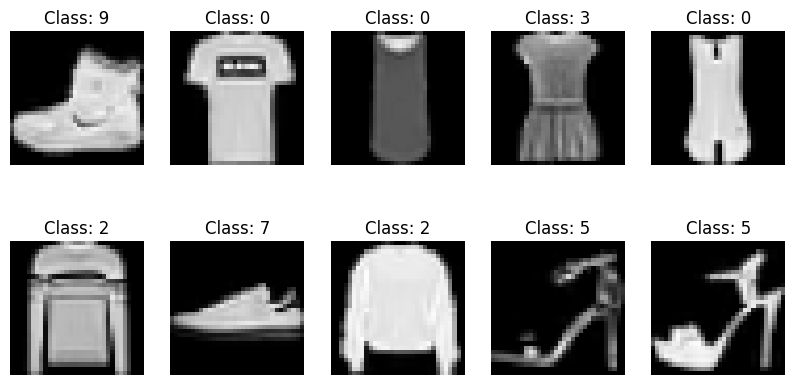

In [26]:
import matplotlib.pyplot as plt

# Plot some RGB images from the resized dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_train_resized[i])
    axes[i].set_title(f'Class: {y_train[i]}')
    axes[i].axis('off')

plt.show()


## **VGG19 Model**

In [23]:
# Modify the input shape for VGG19
base_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3),
    classes=y_train_enc.shape[1]
)

# Make the weights non-trainable
for layer in base_model.layers:
    layer.trainable = False

def create_transfer_model(base_model, learning_rate=0.001, learning_rate_decay=0.9, no_classes=y_train_enc.shape[1]):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation=('relu')))
    model.add(Dropout(0.2))
    model.add(Dense(no_classes, activation=('softmax')))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate, beta_1=learning_rate_decay),
        metrics=['accuracy'],
    )
    return model

# Create the transfer model
transfer_model = create_transfer_model(base_model)
transfer_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 20091338 (76.64 MB)
Trainable params: 66954 (261.54 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


Now that we have the base model, let's train it and see what performance we get by training the last few layers.

In [25]:
# Train the model without validation data
history = transfer_model.fit(
    X_train_resized, y_train_enc,
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.5587 - accuracy: 0.7989
Epoch 2/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.4509 - accuracy: 0.8349
Epoch 3/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.4161 - accuracy: 0.8469
Epoch 4/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.3950 - accuracy: 0.8542
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.3815 - accuracy: 0.8592


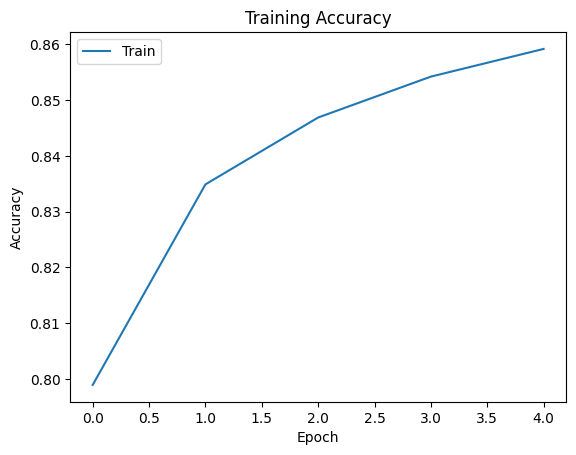

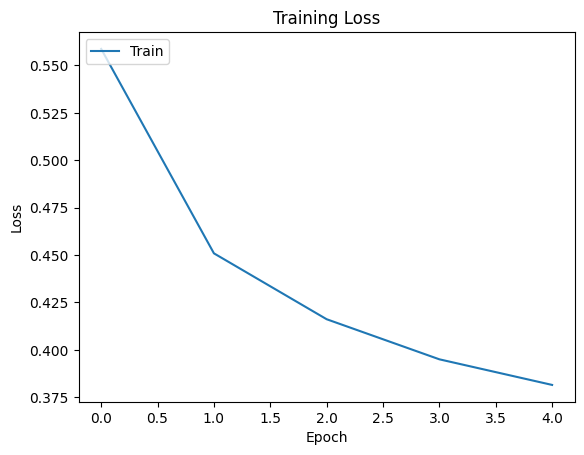

In [27]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

#prediction on trained model
predictions = transfer_model.predict(X_test_resized)

# convert the predictions back to class labels
predicted_labels = enc.inverse_transform(predictions)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 31s 99ms/step
Test Accuracy: 85.62%


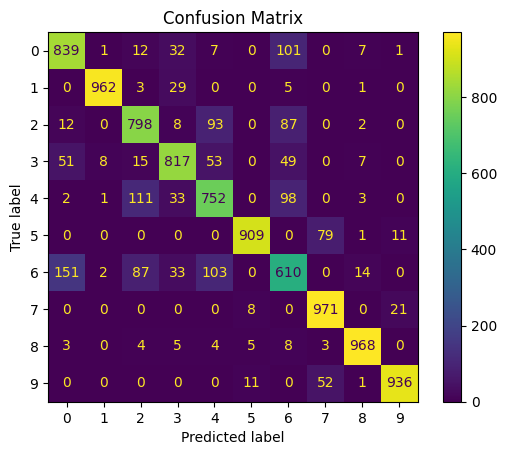

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Convert one-hot encoded predictions back to class labels
predicted_labels = enc.inverse_transform(predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=enc.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## **ResNet Model**

These architectures have been widely used and achieved state-of-the-art performance in various computer vision tasks, including image classification, object detection, and segmentation.

Do all above code for ResNet model

In [35]:
from keras.applications import resnet

base_model = resnet.ResNet50(
    include_top=False,    
    weights='imagenet',
    input_shape=(32, 32, 3),
    classes=y_train_enc.shape[1])

# We make the weight non-trainable to reduce the number of weights in the network
for layer in base_model.layers:
    layer.trainable = False

# Create the transfer model
transfer_model = create_transfer_model(base_model)
transfer_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 23851274 (90.99 MB)
Trainable params: 263562 (1.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [36]:
# Train the model without validation data
history = transfer_model.fit(
    X_train_resized, y_train_enc,
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
1875/1875 [==============================] - 140s 72ms/step - loss: 1.0113 - accuracy: 0.6232
Epoch 2/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.7902 - accuracy: 0.7014
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.7429 - accuracy: 0.7187
Epoch 4/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.7148 - accuracy: 0.7296
Epoch 5/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.7099 - accuracy: 0.7300


visualize the training process of a neural network using two common plots: one for training accuracy and another for training loss.

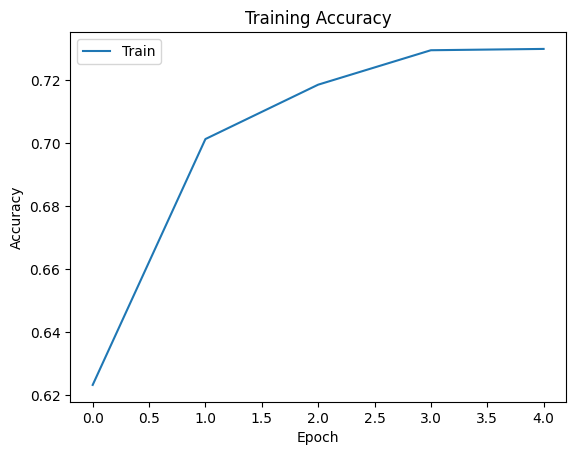

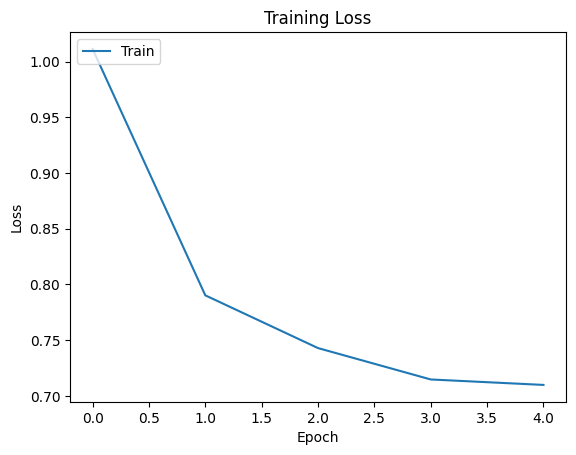

In [37]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')
plt.show()

**Calculate metrics**

In [38]:
from sklearn.metrics import accuracy_score

#prediction on trained model
predictions = transfer_model.predict(X_test_resized)

# convert the predictions back to class labels
predicted_labels = enc.inverse_transform(predictions)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 22s 67ms/step
Test Accuracy: 75.60%


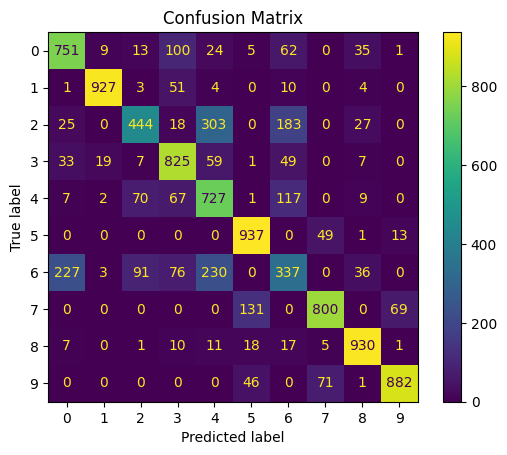

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Convert one-hot encoded predictions back to class labels
predicted_labels = enc.inverse_transform(predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=enc.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

<hr>

## Question

#### Express our opnion about the effects of the window size (i.e. receptive field) in convolution layers on the performance of neural network. In other words, what happens if we increase or decrease the size of the receptive field? and Why?

In deep networks, a receptive field or field of view  is the region in the input space that affects the features of a particular layer.

The window size, or receptive field, in convolutional layers plays a crucial role in determining the performance of a neural network, especially in tasks related to computer vision. The receptive field refers to the region of input data that a convolutional layer's filter considers when producing an output.

1. **Increased Receptive Field:**
   - *Pros:*
     - **Global Information Integration:** A larger receptive field allows the network to capture more global information from the input, enabling it to understand larger patterns and context.
     - **Hierarchical Feature Learning:** With a bigger receptive field, the network can learn hierarchical features by combining information from a broader area, facilitating the recognition of complex patterns.
     - **Translation Invariance:** A larger receptive field enhances translation invariance, meaning the network becomes less sensitive to the exact position of features in the input.

   - *Cons:*
     - **Increased Computational Cost:** Larger receptive fields often result in increased computational complexity, as more parameters need to be learned, and more computations are required.

2. **Decreased Receptive Field:**
   - *Pros:*
     - **Localized Feature Extraction:** A smaller receptive field allows the network to focus on local details and fine-grained features, which can be essential for capturing intricate patterns.
     - **Reduced Computational Cost:** Smaller receptive fields generally require fewer parameters and computations, making the network computationally more efficient.

   - *Cons:*
     - **Limited Contextual Information:** A smaller receptive field may limit the network's ability to capture global context and long-range dependencies in the input data.
     - **Increased Sensitivity to Noise:** A network with a smaller receptive field may be more sensitive to noise and variations in the input.

The choice of receptive field size depends on the specific requirements of the task. In some cases, a balance between local and global information is necessary for optimal performance. Techniques like dilated convolutions or the use of multiple layers with different receptive field sizes (as in inception modules) can be employed to capture both local and global features effectively.

In summary, adjusting the receptive field size in convolutional layers is a trade-off between capturing local details and global context, and the optimal choice depends on the characteristics of the input data and the goals of the neural network.